<a href="https://colab.research.google.com/github/MarinaOrzechowski/CNN-on-Quick-Draw-dataset/blob/master/load_%26_pickle_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<center>**Load the data**</center>

The data was taken from Quick, Draw! dataset: https://github.com/googlecreativelab/quickdraw-dataset .

The Quick Draw Dataset is a collection of 50 million drawings across 345 categories, contributed by players of the game Quick, Draw!. The drawings were captured as timestamped vectors, tagged with metadata including what the player was asked to draw and in which country the player was located. You can browse the recognized drawings on [quickdraw.withgoogle.com/data](https://).

For our project we will use a preprocessed dataset in .npy format. Each file includes >100000 images of a specific category. The total dataset size is 37 Gb, which is very difficult to work with.Therefore, we reduced the number of images for each category to 10000 (reduce_dataset.py) and the total dataset size to 2.5 Gb. However, Google Colab RAM of 25.5 Gb wasn't enough to process all 345 categories, so we are planning to consider only 100. Currently it is 10 for, just for education purpose. 

Next step is to load the data and pickle it.

In [92]:
from google.colab import drive
drive.mount('/content/gdrive')

import numpy as np
import os
import pickle

import matplotlib.pyplot as plt
%matplotlib inline

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [93]:
files = os.listdir("/content/gdrive/My Drive/CTPproject/data")
img_per_category = 10000
num_of_categories = 10
x = []
x_load = []
y = []
y_load = []
print(files)

['airplane.npy', 'alarm clock.npy', 'angel.npy', 'ambulance.npy', 'ant.npy', 'apple.npy', 'arm.npy', 'asparagus.npy', 'axe.npy', 'backpack.npy', 'bandage.npy', 'banana.npy', 'baseball bat.npy', 'baseball.npy', 'barn.npy', 'bat.npy', 'basket.npy', 'basketball.npy', 'bear.npy', 'bathtub.npy', 'beach.npy', 'beard.npy', 'bed.npy', 'bee.npy', 'bench.npy', 'bicycle.npy', 'belt.npy', 'binoculars.npy', 'birthday cake.npy', 'bird.npy', 'book.npy', 'blackberry.npy', 'blueberry.npy', 'boomerang.npy', 'bowtie.npy', 'bracelet.npy', 'brain.npy', 'bridge.npy', 'bread.npy', 'broom.npy', 'bucket.npy', 'broccoli.npy', 'bulldozer.npy', 'bus.npy', 'bush.npy', 'cake.npy', 'cactus.npy', 'butterfly.npy', 'calculator.npy', 'calendar.npy', 'camel.npy', 'camouflage.npy', 'camera.npy', 'cannon.npy', 'campfire.npy', 'candle.npy', 'canoe.npy', 'carrot.npy', 'car.npy', 'castle.npy', 'cell phone.npy', 'ceiling fan.npy', 'cat.npy', 'chair.npy', 'cello.npy', 'church.npy', 'circle.npy', 'chandelier.npy', 'clarinet.npy'

Lets see how some of the images look like:

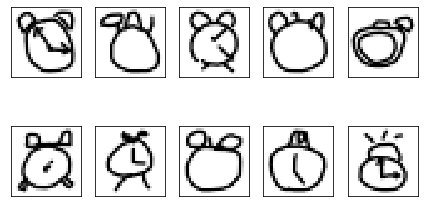

In [94]:
# test print. how the data looks like?
file = "/content/gdrive/My Drive/CTPproject/data//" + files[1]
x_test = np.load(file) #returns an array of lists(images) with 784 elements(coordinates) in each (flattened 28x28)
x_test = x_test.reshape(x_test.shape[0], 28,28)

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(10):
    img = x_test[i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

In [0]:
def load_data():
  '''function which reads each data file in the testdata directory and extracts lists of pixels'''
  x_load.clear()
  y_load.clear()
  count = 0
  for num, file in enumerate(files[:num_of_categories]):
      file = "/content/gdrive/My Drive/CTPproject/data/" + file
      x = np.load(file)
      x = x / 255.
      x = x[:img_per_category, :] # consider only first 10000 images for each category
      x_load.append(x)
      y = [count for _ in range(img_per_category)]
      count += 1
      y = np.array(y)
      y_load.append(y)

  return x_load, y_load

In [0]:
images, labels = load_data()
images = np.array(images)
labels = np.array(labels)

In [109]:
print(images.shape)
print(labels.shape)

(10, 10000, 784)
(10, 10000)


Reshape data:

In [0]:
images=images.reshape(images.shape[0]*images.shape[1],images.shape[2])
labels=labels.reshape(labels.shape[0]*labels.shape[1])

In [111]:
print(images.shape)
print(labels.shape)

(100000, 784)
(100000,)


In [0]:
images = images.reshape(images.shape[0], 28,28)

In [113]:
print(images.shape)
print(labels.shape)

(100000, 28, 28)
(100000,)


Pickle data:

In [0]:

with open("/content/gdrive/My Drive/CTPproject/imagesTest", "wb") as f:
    pickle.dump(images, f, protocol=4)
with open("/content/gdrive/My Drive/CTPproject/labelsTest", "wb") as f:
    pickle.dump(labels, f, protocol=4)